In [5]:
import os
import sys
import numpy             as np
import pylab             as pl
import matplotlib.pyplot as plt
import matplotlib        as mpl

In [6]:
sys.path.append('{}'.format(os.environ['HOME']))
sys.path.append('{}/DESI'.format(os.environ['HOME']))

In [7]:
os.environ['GOLD_DIR']    = '/cosma5/data/durham/{}/GAMA4/'.format(os.environ['USER'])
os.environ['RANDOMS_DIR'] = '/cosma5/data/durham/{}/GAMA4/randoms/'.format(os.environ['USER'])

In [8]:
from findfile import findfile, gather_cat, fetch_fields
from vmaxer   import vmaxer_rand
from volfracs import volfracs

In [9]:
dryrun = False
survey = 'gama'
prefix = 'randoms_ddp1'

In [10]:
fields = fetch_fields(survey)

In [11]:
rpaths = [findfile(ftype='randoms_bd_ddp_n8', dryrun=dryrun, field=ff, survey=survey, prefix=prefix) for ff in fields]
rpaths

['/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G9_0.fits',
 '/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G12_0.fits',
 '/cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_G15_0.fits']

In [12]:
rand   = vmaxer_rand(survey=survey, ftype='randoms_bd_ddp_n8', dryrun=dryrun, prefix=prefix)

FILLFACTOR has fraction 0.7797192364390116 not set.
FILLFACTOR has fraction 0.0 now set.
Unique tiers: [0 1 2 3 4 5 6 7 8]
DDP1 randoms: 0.019057 < z < 0.271510
IN_D8LUMFN [ True  True  True ...  True  True  True]

DDP1_d0_VOLFRAC OF 0.257706 added.
DDP1_d0_TIERMED d8 OF -0.895294 added.
DDP1_d0_ZEROPOINT_VOLFRAC OF 0.1985307033 added.
DDP1_d0_ZEROPOINT_TIERMED d8 OF -0.852199 added.

DDP1_d1_VOLFRAC OF 0.109429 added.
DDP1_d1_TIERMED d8 OF -0.657130 added.
DDP1_d1_ZEROPOINT_VOLFRAC OF 0.1184715057 added.
DDP1_d1_ZEROPOINT_TIERMED d8 OF -0.657067 added.

DDP1_d2_VOLFRAC OF 0.086868 added.
DDP1_d2_TIERMED d8 OF -0.498770 added.
DDP1_d2_ZEROPOINT_VOLFRAC OF 0.0940978655 added.
DDP1_d2_ZEROPOINT_TIERMED d8 OF -0.498898 added.

DDP1_d3_VOLFRAC OF 0.188336 added.
DDP1_d3_TIERMED d8 OF -0.215405 added.
DDP1_d3_ZEROPOINT_VOLFRAC OF 0.2034836273 added.
DDP1_d3_ZEROPOINT_TIERMED d8 OF -0.215574 added.

DDP1_d4_VOLFRAC OF 0.171155 added.
DDP1_d4_TIERMED d8 OF 0.328193 added.
DDP1_d4_ZEROPOINT_VO

chgrp desi /cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_GALL_0.fits b''
chmod  700 /cosma5/data/durham/dc-wils7/GAMA4/randoms/randoms_ddp1_bd_ddp_n8_GALL_0.fits b''


In [13]:
np.unique(rand['FIELD'], return_counts=True)

(<Column name='FIELD' dtype='bytes3' length=3>
 G12
 G15
  G9,
 array([1389734, 1389734, 1389734]))

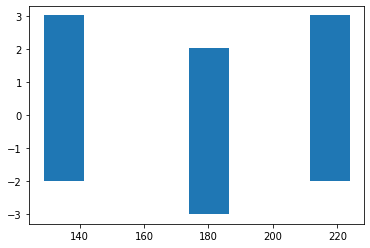

In [14]:
pl.plot(rand['RANDOM_RA'], rand['RANDOM_DEC'], marker=',', lw=0.0)

In [15]:
sorted(rand.meta)

['AREA',
 'D80LIMS',
 'D81LIMS',
 'D82LIMS',
 'D83LIMS',
 'D84LIMS',
 'D85LIMS',
 'D86LIMS',
 'D87LIMS',
 'D88LIMS',
 'DDP1ZLIMS_NGAL',
 'DDP1_DENS',
 'DDP1_FULL8FRAC',
 'DDP1_NGAL',
 'DDP1_VZ',
 'DDP1_ZMAX',
 'DDP1_ZMIN',
 'DDP1_d0_TIERMEDd8',
 'DDP1_d0_VOLFRAC',
 'DDP1_d0_ZEROPOINT_TIERMEDd8',
 'DDP1_d0_ZEROPOINT_VOLFRAC',
 'DDP1_d1_TIERMEDd8',
 'DDP1_d1_VOLFRAC',
 'DDP1_d1_ZEROPOINT_TIERMEDd8',
 'DDP1_d1_ZEROPOINT_VOLFRAC',
 'DDP1_d2_TIERMEDd8',
 'DDP1_d2_VOLFRAC',
 'DDP1_d2_ZEROPOINT_TIERMEDd8',
 'DDP1_d2_ZEROPOINT_VOLFRAC',
 'DDP1_d3_TIERMEDd8',
 'DDP1_d3_VOLFRAC',
 'DDP1_d3_ZEROPOINT_TIERMEDd8',
 'DDP1_d3_ZEROPOINT_VOLFRAC',
 'DDP1_d4_TIERMEDd8',
 'DDP1_d4_VOLFRAC',
 'DDP1_d4_ZEROPOINT_TIERMEDd8',
 'DDP1_d4_ZEROPOINT_VOLFRAC',
 'DDP1_d5_TIERMEDd8',
 'DDP1_d5_VOLFRAC',
 'DDP1_d5_ZEROPOINT_TIERMEDd8',
 'DDP1_d5_ZEROPOINT_VOLFRAC',
 'DDP1_d6_TIERMEDd8',
 'DDP1_d6_VOLFRAC',
 'DDP1_d6_ZEROPOINT_TIERMEDd8',
 'DDP1_d6_ZEROPOINT_VOLFRAC',
 'DDP1_d7_TIERMEDd8',
 'DDP1_d7_VOLFRAC',
 'DDP1_

In [16]:
cmap     = plt.cm.tab20c

cmaplist = [cmap(i) for i in range(cmap.N)]

cmap     = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, cmap.N)

bounds   = np.linspace(0, 9, 10)
norm     = mpl.colors.BoundaryNorm(bounds, cmap.N)

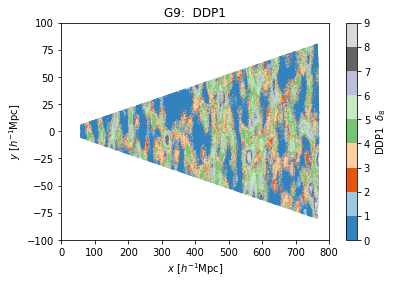

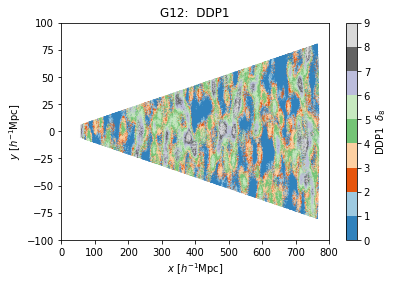

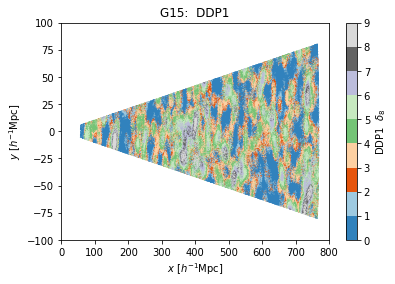

In [17]:
for field in ['G9', 'G12', 'G15']:
    pos       = np.c_[rand['ROTCARTESIAN_X'], rand['ROTCARTESIAN_Y'], rand['ROTCARTESIAN_Z']]    
    isin      = (rand['FIELD'] == field)
        
    fills     = rand['DDP1_DELTA8_TIER'].data[isin]
    pos_slice = pos[isin]

    fills     = fills[np.abs(pos_slice[:,2]) < 5.]
    pos_slice = pos_slice[np.abs(pos_slice[:,2]) < 5.]
      
    plt.scatter(pos_slice[:,0],\
                pos_slice[:,1],\
                c=fills,\
                marker='.',\
                lw=0.0,\
                s=2,\
                cmap=cmap,\
                norm=norm)
    
    pl.xlabel('$x$ [$h^{-1}$Mpc]')
    pl.ylabel('$y$ [$h^{-1}$Mpc]')

    pl.xlim(0.,  800.)
    pl.ylim(-100., 100.)
    
    pl.colorbar(label='DDP1  $\delta_8$')
    
    plt.title('{}:  DDP1'.format(field))
        
    pl.show()

In [18]:
colors     = plt.rcParams['axes.prop_cycle'].by_key()['color']

Unique tiers: [0 1 2 3 4 5 6 7 8]
DDP1 randoms: 0.036768 < z < 0.270345
IN_D8LUMFN [ True  True  True ...  True  True  True]

DDP1_d0_VOLFRAC OF 0.270450 added.
DDP1_d0_TIERMED d8 OF -0.898717 added.
DDP1_d0_ZEROPOINT_VOLFRAC OF 0.2114885567 added.
DDP1_d0_ZEROPOINT_TIERMED d8 OF -0.854062 added.

DDP1_d1_VOLFRAC OF 0.106509 added.
DDP1_d1_TIERMED d8 OF -0.657516 added.
DDP1_d1_ZEROPOINT_VOLFRAC OF 0.1171631598 added.
DDP1_d1_ZEROPOINT_TIERMED d8 OF -0.657621 added.

DDP1_d2_VOLFRAC OF 0.083968 added.
DDP1_d2_TIERMED d8 OF -0.498982 added.
DDP1_d2_ZEROPOINT_VOLFRAC OF 0.0908351790 added.
DDP1_d2_ZEROPOINT_TIERMED d8 OF -0.498765 added.

DDP1_d3_VOLFRAC OF 0.186233 added.
DDP1_d3_TIERMED d8 OF -0.214282 added.
DDP1_d3_ZEROPOINT_VOLFRAC OF 0.2004780362 added.
DDP1_d3_ZEROPOINT_TIERMED d8 OF -0.213689 added.

DDP1_d4_VOLFRAC OF 0.172240 added.
DDP1_d4_TIERMED d8 OF 0.331488 added.
DDP1_d4_ZEROPOINT_VOLFRAC OF 0.1851264304 added.
DDP1_d4_ZEROPOINT_TIERMED d8 OF 0.331993 added.

DDP1_d5_VOL

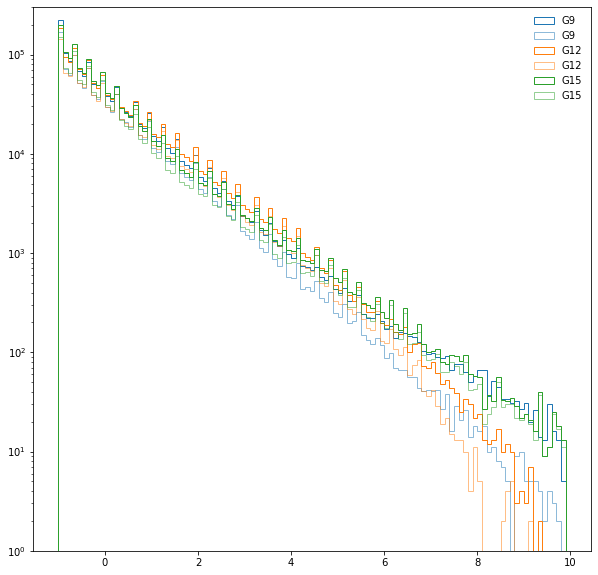

In [19]:
fieldrands = {}

fig, ax  = plt.subplots(1, 1, figsize=(10,10))

for i, field in enumerate(['G9', 'G12', 'G15']):
    isin      = (rand['FIELD'] == field)
    fills     = rand['DDP1_DELTA8'].data[isin]
    
    ax.hist(fills, bins=np.arange(-1., 10., 0.1), histtype='step', label=field, color=colors[i])

    isin      = (rand['FIELD'] == field) & (rand['FILLFACTOR'] > 0.8)
    fills     = rand['DDP1_DELTA8'].data[isin]
    
    ax.hist(fills, bins=np.arange(-1., 10., 0.1), histtype='step', label=field, alpha=0.5, color=colors[i])

    fieldrands[field] = volfracs(rand[isin])
    
ax.set_ylim(1., 3.e5)
ax.set_yscale('log')

pl.legend(frameon=False)

In [20]:
def dfilter(mydict):
    return  {k: v for k, v in mydict.items() if k.startswith('DDP1_d')}

In [21]:
hdrs = [dfilter(fieldrands[ff].meta) for ff in fields]

print('{}\t{}\t\t{}\t\t{}'.format(''.ljust(25), 'G9', 'G12', 'G15'))
print()

for key in hdrs[0].keys():    
    print('{}\t{}\t{}\t{}'.format(key.ljust(25), hdrs[0][key], hdrs[1][key], hdrs[2][key]))

                         	G9		G12		G15

DDP1_d0_VOLFRAC          	0.270450	0.242541	0.260126
DDP1_d0_TIERMEDd8        	-0.898717	-0.895101	-0.891915
DDP1_d0_ZEROPOINT_VOLFRAC	0.211489	0.186181	0.197923
DDP1_d0_ZEROPOINT_TIERMEDd8	-0.854062	-0.852816	-0.849627
DDP1_d1_VOLFRAC          	0.106509	0.105766	0.116011
DDP1_d1_TIERMEDd8        	-0.657516	-0.657065	-0.656834
DDP1_d1_ZEROPOINT_VOLFRAC	0.117163	0.113831	0.124420
DDP1_d1_ZEROPOINT_TIERMEDd8	-0.657621	-0.656397	-0.657158
DDP1_d2_VOLFRAC          	0.083968	0.085470	0.091166
DDP1_d2_TIERMEDd8        	-0.498982	-0.498151	-0.499153
DDP1_d2_ZEROPOINT_VOLFRAC	0.090835	0.091348	0.100111
DDP1_d2_ZEROPOINT_TIERMEDd8	-0.498765	-0.498198	-0.499657
DDP1_d3_VOLFRAC          	0.186233	0.183552	0.195222
DDP1_d3_TIERMEDd8        	-0.214282	-0.216902	-0.215069
DDP1_d3_ZEROPOINT_VOLFRAC	0.200478	0.198686	0.211287
DDP1_d3_ZEROPOINT_TIERMEDd8	-0.213689	-0.217399	-0.215647
DDP1_d4_VOLFRAC          	0.172240	0.172686	0.168540
DDP1_d4_TIERMEDd8        	0

# Done.